<a href="https://colab.research.google.com/github/GabrielRamirezs/Metodos1_KarenQuevedo_GabrielRamirez/blob/main/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Punto de mínimos cuadrados: [1.42857143 0.42857143]
Incentro: [2.25658351 0.41886117]


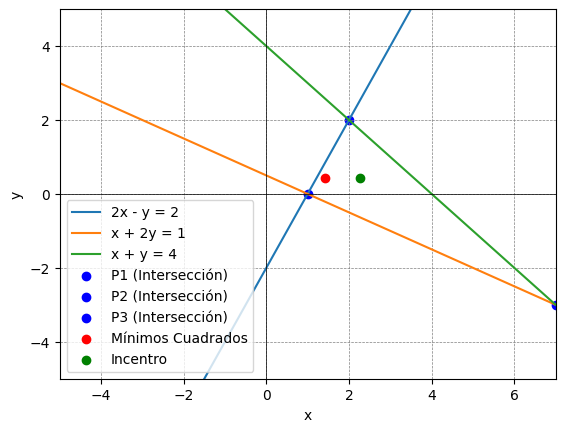

In [5]:
#1
A = np.array([[2, -1], [1, 2], [1, 1]])
b = np.array([2, 1, 4])

def GetFit(A, b):
    AT = A.T
    ATA = AT @ A
    ATb = AT @ b
    xsol = np.linalg.solve(ATA, ATb)
    return xsol

xsol = GetFit(A, b)
print(f"Punto de mínimos cuadrados: {xsol}")

def interseccion(A1, b1, A2, b2):
    A = np.vstack([A1, A2])
    b = np.vstack([b1, b2])
    return np.linalg.solve(A, b).flatten()

A1, b1 = np.array([[2, -1]]), np.array([2])
A2, b2 = np.array([[1, 2]]), np.array([1])
A3, b3 = np.array([[1, 1]]), np.array([4])

p1 = interseccion(A1, b1, A2, b2)
p2 = interseccion(A2, b2, A3, b3)
p3 = interseccion(A1, b1, A3, b3)

def incentro(p1, p2, p3):
    a = np.linalg.norm(p2 - p3)
    b = np.linalg.norm(p1 - p3)
    c = np.linalg.norm(p1 - p2)
    P = a + b + c
    return (a * p1 + b * p2 + c * p3) / P

incenter = incentro(p1, p2, p3)
print(f"Incentro: {incenter}")

x = np.linspace(-5, 7, 400)
y1 = 2 * x - 2
y2 = (1 - x) / 2
y3 = 4 - x

plt.plot(x, y1, label='2x - y = 2')
plt.plot(x, y2, label='x + 2y = 1')
plt.plot(x, y3, label='x + y = 4')

plt.scatter(p1[0], p1[1], color='blue', label='P1 (Intersección)')
plt.scatter(p2[0], p2[1], color='blue', label='P2 (Intersección)')
plt.scatter(p3[0], p3[1], color='blue', label='P3 (Intersección)')

plt.scatter(xsol[0], xsol[1], color='red', label='Mínimos Cuadrados', zorder=5)
plt.scatter(incenter[0], incenter[1], color='green', label='Incentro', zorder=5)

plt.xlim(-5, 7)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


          x          y
0  0.000000  -4.786585
1  1.052632  -4.065870
2  2.105263   0.179649
3  3.157895   2.719807
4  4.210526   2.878523
5  5.263158   4.527426
6  6.315789   8.827734
7  7.368421  10.977220
8  8.421053  11.799440
9  9.473684  14.529310
Coeficientes: a0 = -5.129, a1 = 2.125


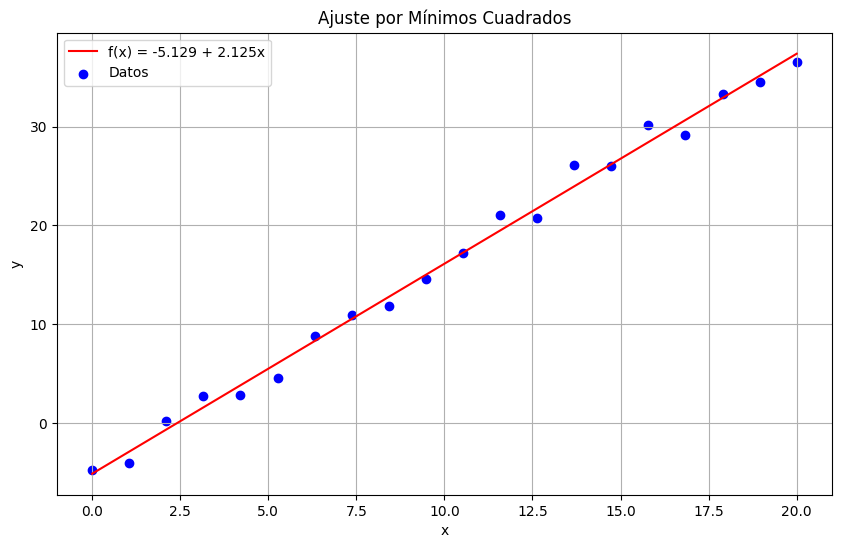

In [6]:
#2
import pandas as pd
import requests

data = pd.read_csv('MinimosLineal.txt', sep=' ', header=None)
data.columns = ['x', 'y']
print(data.head(10))

x = data['x']
y = data['y']

A = np.vstack([x, np.ones(len(x))]).T
a1, a0 = np.linalg.lstsq(A, y, rcond=None)[0]

print(f"Coeficientes: a0 = {a0:.3f}, a1 = {a1:.3f}")

fitted_y = a0 + a1 * x

plt.figure(figsize=(10, 6))
plt.plot(x, fitted_y, 'r', label=f'f(x) = {a0:.3f} + {a1:.3f}x')
plt.scatter(x, y, label='Datos', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por Mínimos Cuadrados')
plt.legend()
plt.grid(True)
plt.show()


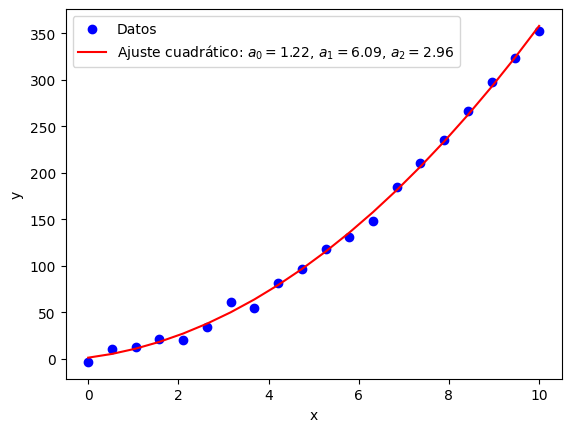

In [7]:
#3
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('MinimosCuadratico.txt')
x = data[:, 0]
y = data[:, 1]

A = np.vstack([np.ones(len(x)), x, x**2]).T
coeffs, _, _, _ = np.linalg.lstsq(A, y, rcond=None)

y_fit = coeffs[0] + coeffs[1]*x + coeffs[2]*x**2


plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, y_fit, label=f'Ajuste cuadrático: $a_0={coeffs[0]:.2f}$, $a_1={coeffs[1]:.2f}$, $a_2={coeffs[2]:.2f}$', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


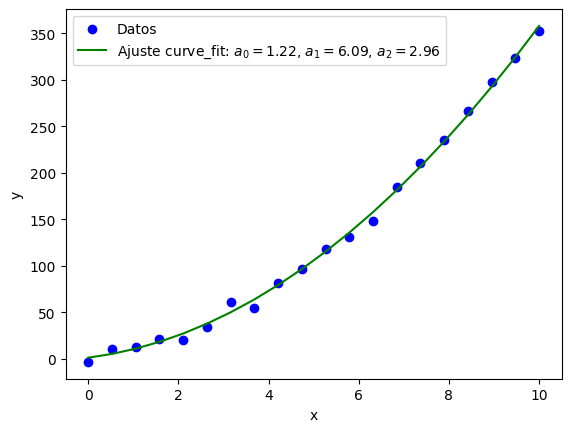

In [8]:
#4
from scipy.optimize import curve_fit
def func(x, a0, a1, a2):
    return a0 + a1*x + a2*x**2
popt, _ = curve_fit(func, x, y)

y_curvefit = func(x, *popt)

plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, y_curvefit, label=f'Ajuste curve_fit: $a_0={popt[0]:.2f}$, $a_1={popt[1]:.2f}$, $a_2={popt[2]:.2f}$', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

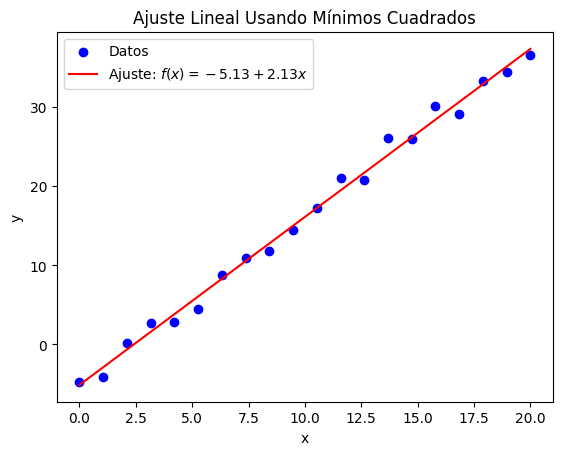

In [12]:
data = np.loadtxt('MinimosLineal.txt')
x_data = data[:, 0]
y_data = data[:, 1]

def linear_model(x, a0, a1):
    return a0 + a1 * x

params, covariance = curve_fit(linear_model, x_data, y_data)
a0, a1 = params

plt.scatter(x_data, y_data, label='Datos', color='blue')
plt.plot(x_data, linear_model(x_data, *params), label=f'Ajuste: $f(x)={a0:.2f} + {a1:.2f}x$', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste Lineal Usando Mínimos Cuadrados')
plt.show()


In [9]:
#6
import numpy as np

#estos datos los use de ejemplo ya que en el ejercicio no los dice:
xi = np.array([1, 2, 3, 4, 5])
yi = np.array([2.2, 2.8, 3.6, 4.5, 5.1])

n = len(xi)
sum_x = np.sum(xi)
sum_x2 = np.sum(xi**2)
sum_x3 = np.sum(xi**3)
sum_x4 = np.sum(xi**4)
sum_y = np.sum(yi)
sum_xy = np.sum(xi * yi)
sum_x2y = np.sum((xi**2) * yi)
A = np.array([
    [n, sum_x, sum_x2],
    [sum_x, sum_x2, sum_x3],
    [sum_x2, sum_x3, sum_x4]
])

B = np.array([sum_y, sum_xy, sum_x2y])
params = np.linalg.solve(A, B)
a0, a1, a2 = params
print(f"Los parámetros encontrados son: a0 = {a0}, a1 = {a1}, a2 = {a2}")

Los parámetros encontrados son: a0 = 1.4399999999999786, a1 = 0.7071428571428747, a2 = 0.0071428571428543


In [10]:
#7
b = np.array([-3, -3, 8, 9])
A = np.array([
    [3, 1, -1],
    [1, 2, 0],
    [0, 1, 2],
    [1, 1, -1]
])

ATA = A.T @ A
ATb = A.T @ b
x = np.linalg.solve(ATA, ATb)

pW_b = A @ x
print("Proyección ortogonal usando mínimos cuadrados:", pW_b)
def gram_schmidt(V):
    U = np.zeros_like(V, dtype=float)
    for i in range(V.shape[1]):
        U[:, i] = V[:, i]
        for j in range(i):
            U[:, i] -= np.dot(U[:, j], V[:, i]) / np.dot(U[:, j], U[:, j]) * U[:, j]
        U[:, i] /= np.linalg.norm(U[:, i])
    return U

U = np.array([
    [3, 1, -1],
    [1, 2, 0],
    [0, 1, 2],
    [1, 1, -1]
])
V = gram_schmidt(U)
print("Base ortonormal (v1, v2, v3):", V)

c = np.array([np.dot(b, v) for v in V.T])

pW_b_gram_schmidt = sum(c[i] * V[:, i] for i in range(len(c)))
print("Proyección ortogonal usando Gram-Schmidt:", pW_b_gram_schmidt)


Proyección ortogonal usando mínimos cuadrados: [-2.0000000e+00  3.0000000e+00  4.0000000e+00 -4.4408921e-16]
Base ortonormal (v1, v2, v3): [[ 0.90453403 -0.32961713  0.25633581]
 [ 0.30151134  0.75341057 -0.26982716]
 [ 0.          0.51796977  0.78249877]
 [ 0.30151134  0.2354408  -0.49918025]]
Proyección ortogonal usando Gram-Schmidt: [-2.00000000e+00  3.00000000e+00  4.00000000e+00  2.22044605e-16]


Generación 0: Energía mínima -12.99
Generación 1: Energía mínima -13.46
Generación 2: Energía mínima -9.42
Generación 3: Energía mínima -12.49
Generación 4: Energía mínima -14.18
Generación 5: Energía mínima -14.01
Generación 6: Energía mínima -14.12
Generación 7: Energía mínima -14.18
Generación 8: Energía mínima -14.71
Generación 9: Energía mínima -14.95
Generación 10: Energía mínima -14.97
Generación 11: Energía mínima -13.19
Generación 12: Energía mínima -17.06
Generación 13: Energía mínima -13.37
Generación 14: Energía mínima -14.15
Generación 15: Energía mínima -13.28
Generación 16: Energía mínima -12.92
Generación 17: Energía mínima -14.09
Generación 18: Energía mínima -12.95
Generación 19: Energía mínima -13.89
Generación 20: Energía mínima -13.21
Generación 21: Energía mínima -12.62
Generación 22: Energía mínima -12.62
Generación 23: Energía mínima -12.18
Generación 24: Energía mínima -12.77
Generación 25: Energía mínima -13.18
Generación 26: Energía mínima -13.23
Generación 2

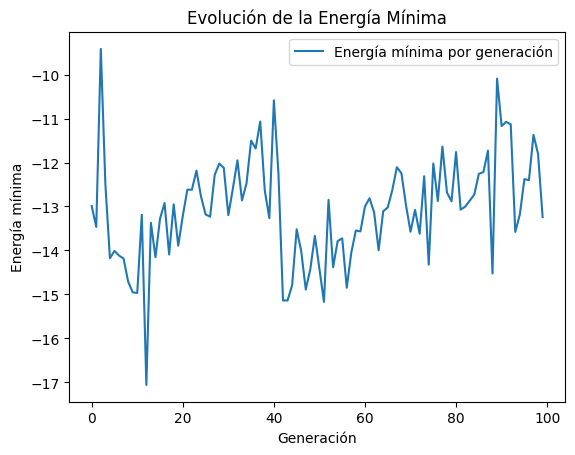

Energía total mínima encontrada: -11.718148781434357


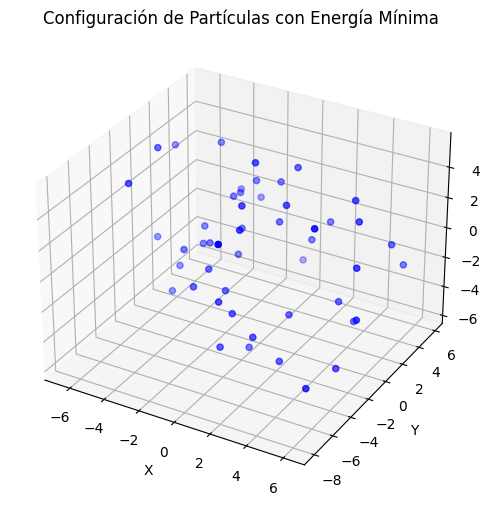

In [13]:
#
import random
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy

def LennardJones(r, epsilon=1, sigma=1):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)


def TotalEnergy(positions, epsilon=1, sigma=1):
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])
            if r != 0:
                energy += LennardJones(r, epsilon, sigma)
    return energy


class ParticleSystem:
    def __init__(self, num_particles, space_dim, id=0):
        self.id = id
        self.num_particles = num_particles
        self.positions = np.random.uniform(-5, 5, (num_particles, space_dim))
        self.energy = TotalEnergy(self.positions)

    def Mutate(self, mutation_rate=0.1):
        for i in range(self.num_particles):
            if np.random.rand() < mutation_rate:
                self.positions[i] += np.random.normal(0, 0.5, self.positions[i].shape)
        self.energy = TotalEnergy(self.positions)

    def GetFitness(self):
        return -self.energy

    def __repr__(self):
        return f"ParticleSystem {self.id} con energía {self.energy:.2f}"


def InitializePopulation(pop_size, num_particles, space_dim):
    return [ParticleSystem(num_particles, space_dim, id=i) for i in range(pop_size)]


def GeneticAlgorithm(population, generations=100, mutation_rate=0.1):
    best_energies = []

    for gen in range(generations):
        for system in population:
            system.Mutate(mutation_rate)

        population = sorted(population, key=lambda x: x.GetFitness(), reverse=True)
        survivors = population[:int(0.5 * len(population))]

        new_population = deepcopy(survivors)
        while len(new_population) < len(population):
            parent1, parent2 = random.sample(survivors, 2)
            child = deepcopy(parent1)
            for i in range(parent1.num_particles):
                if random.random() < 0.5:
                    child.positions[i] = parent2.positions[i]
            child.energy = TotalEnergy(child.positions)
            new_population.append(child)

        population = new_population
        best_system = min(population, key=lambda x: x.energy)
        best_energies.append(best_system.energy)
        print(f"Generación {gen}: Energía mínima {best_system.energy:.2f}")
    plt.plot(best_energies, label='Energía mínima por generación')
    plt.xlabel('Generación')
    plt.ylabel('Energía mínima')
    plt.legend()
    plt.title("Evolución de la Energía Mínima")
    plt.show()
    return population
population_size = 50
num_particles = 50
space_dim = 3
particle_systems = InitializePopulation(population_size, num_particles, space_dim)
GeneticAlgorithm(particle_systems)
best_system = min(optimized_systems, key=lambda x: x.energy)
print("Energía total mínima encontrada:", best_system.energy)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(best_system.positions[:, 0], best_system.positions[:, 1], best_system.positions[:, 2], color='blue')
ax.set_title("Configuración de Partículas con Energía Mínima")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()
